In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [11]:
column_names = [
    "Lever position (lp)", "Ship speed (v)", "GT shaft torque (GTT)", "GT rate of revolutions (GTn)",
    "Gas Generator rate of revolutions (GGn)", "Starboard Propeller Torque (Ts)", "Port Propeller Torque (Tp)",
    "HP Turbine exit temperature (T48)", "GT Compressor inlet air temperature (T1)", "GT Compressor outlet air temperature (T2)",
    "HP Turbine exit pressure (P48)", "GT Compressor inlet air pressure (P1)", "GT Compressor outlet air pressure (P2)",
    "GT exhaust gas pressure (Pexh)", "Turbine Injection Control (TIC)", "Fuel flow (mf)",
    "GT Compressor decay state coefficient", "GT Turbine decay state coefficient"
]

df = pd.read_csv('../UCI CBM Dataset/data.txt', sep='\s+', names=column_names, header=None, engine='python')
df.drop_duplicates()


,Lever position (lp),Ship speed (v),GT shaft torque (GTT),GT rate of revolutions (GTn),Gas Generator rate of revolutions (GGn),Starboard Propeller Torque (Ts),Port Propeller Torque (Tp),HP Turbine exit temperature (T48),GT Compressor inlet air temperature (T1),GT Compressor outlet air temperature (T2),HP Turbine exit pressure (P48),GT Compressor inlet air pressure (P1),GT Compressor outlet air pressure (P2),GT exhaust gas pressure (Pexh),Turbine Injection Control (TIC),Fuel flow (mf),GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [12]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
test_size = 0.2

split_idx = int(len(df_shuffled) * (1 - test_size))

train_data = df_shuffled[:split_idx]
test_data = df_shuffled[split_idx:]

X_train = train_data.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'], axis=1)
y_train = train_data[['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']]

X_test = test_data.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'], axis=1)

y_test = test_data[['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']]

y_test.head()

,GT Compressor decay state coefficient,GT Turbine decay state coefficient
9547,0.999,0.989
9548,0.973,0.989
9549,0.972,0.995
9550,0.969,0.984
9551,0.951,0.989


In [13]:
print(df.isnull().sum())

Lever position (lp)                          0
Ship speed (v)                               0
GT shaft torque (GTT)                        0
GT rate of revolutions (GTn)                 0
Gas Generator rate of revolutions (GGn)      0
Starboard Propeller Torque (Ts)              0
Port Propeller Torque (Tp)                   0
HP Turbine exit temperature (T48)            0
GT Compressor inlet air temperature (T1)     0
GT Compressor outlet air temperature (T2)    0
HP Turbine exit pressure (P48)               0
GT Compressor inlet air pressure (P1)        0
GT Compressor outlet air pressure (P2)       0
GT exhaust gas pressure (Pexh)               0
Turbine Injection Control (TIC)              0
Fuel flow (mf)                               0
GT Compressor decay state coefficient        0
GT Turbine decay state coefficient           0
dtype: int64


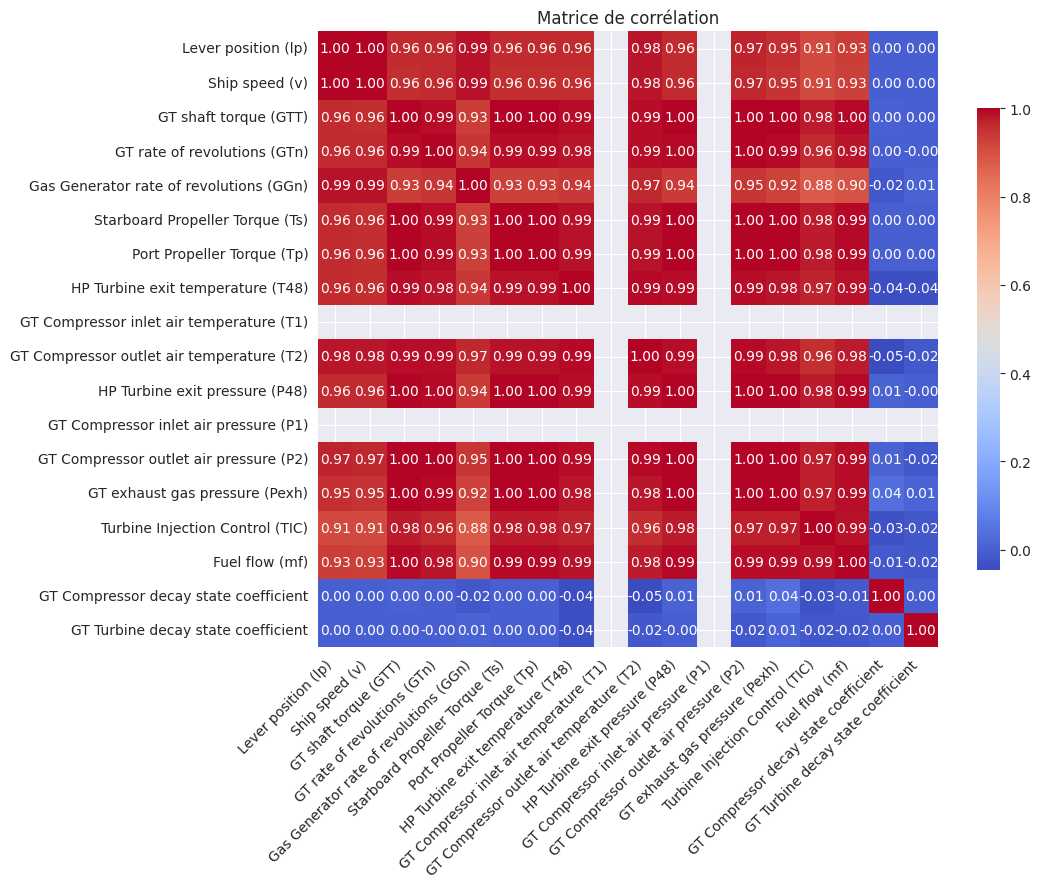

In [14]:

def show_correlation_matrix(dataframe):
    corr = dataframe.corr()
    plt.figure(figsize=(10, 8))

    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=corr.columns, yticklabels=corr.columns,
                cbar_kws={"shrink": .75})

    plt.xticks(rotation=45, ha='right')
    plt.title('Matrice de corrélation')
    plt.show()
show_correlation_matrix(df)

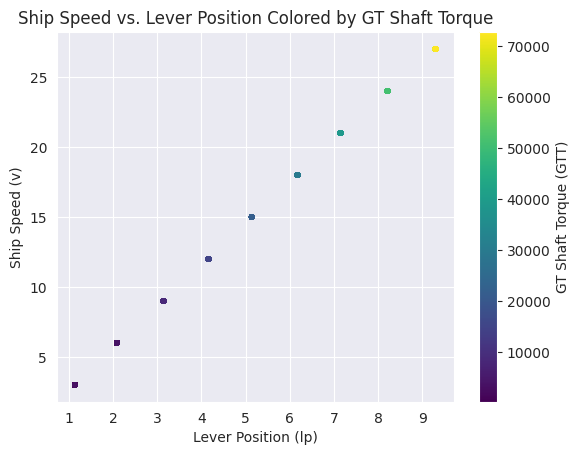

In [15]:
# graphique de dispersion où l'axe des x représente la position du levier, l'axe des y représente la vitesse du navire, et la couleur des points représente le couple de l'arbre de la turbine à gaz.
# la position du levier permet de controler la puissance du moteur
plt.scatter(df['Lever position (lp)'], df['Ship speed (v)'], c=df['GT shaft torque (GTT)'], cmap='viridis', s=10)
plt.xlabel('Lever Position (lp)')
plt.ylabel('Ship Speed (v)')
cbar = plt.colorbar()
cbar.set_label('GT Shaft Torque (GTT)')
plt.title('Ship Speed vs. Lever Position Colored by GT Shaft Torque')
plt.show()

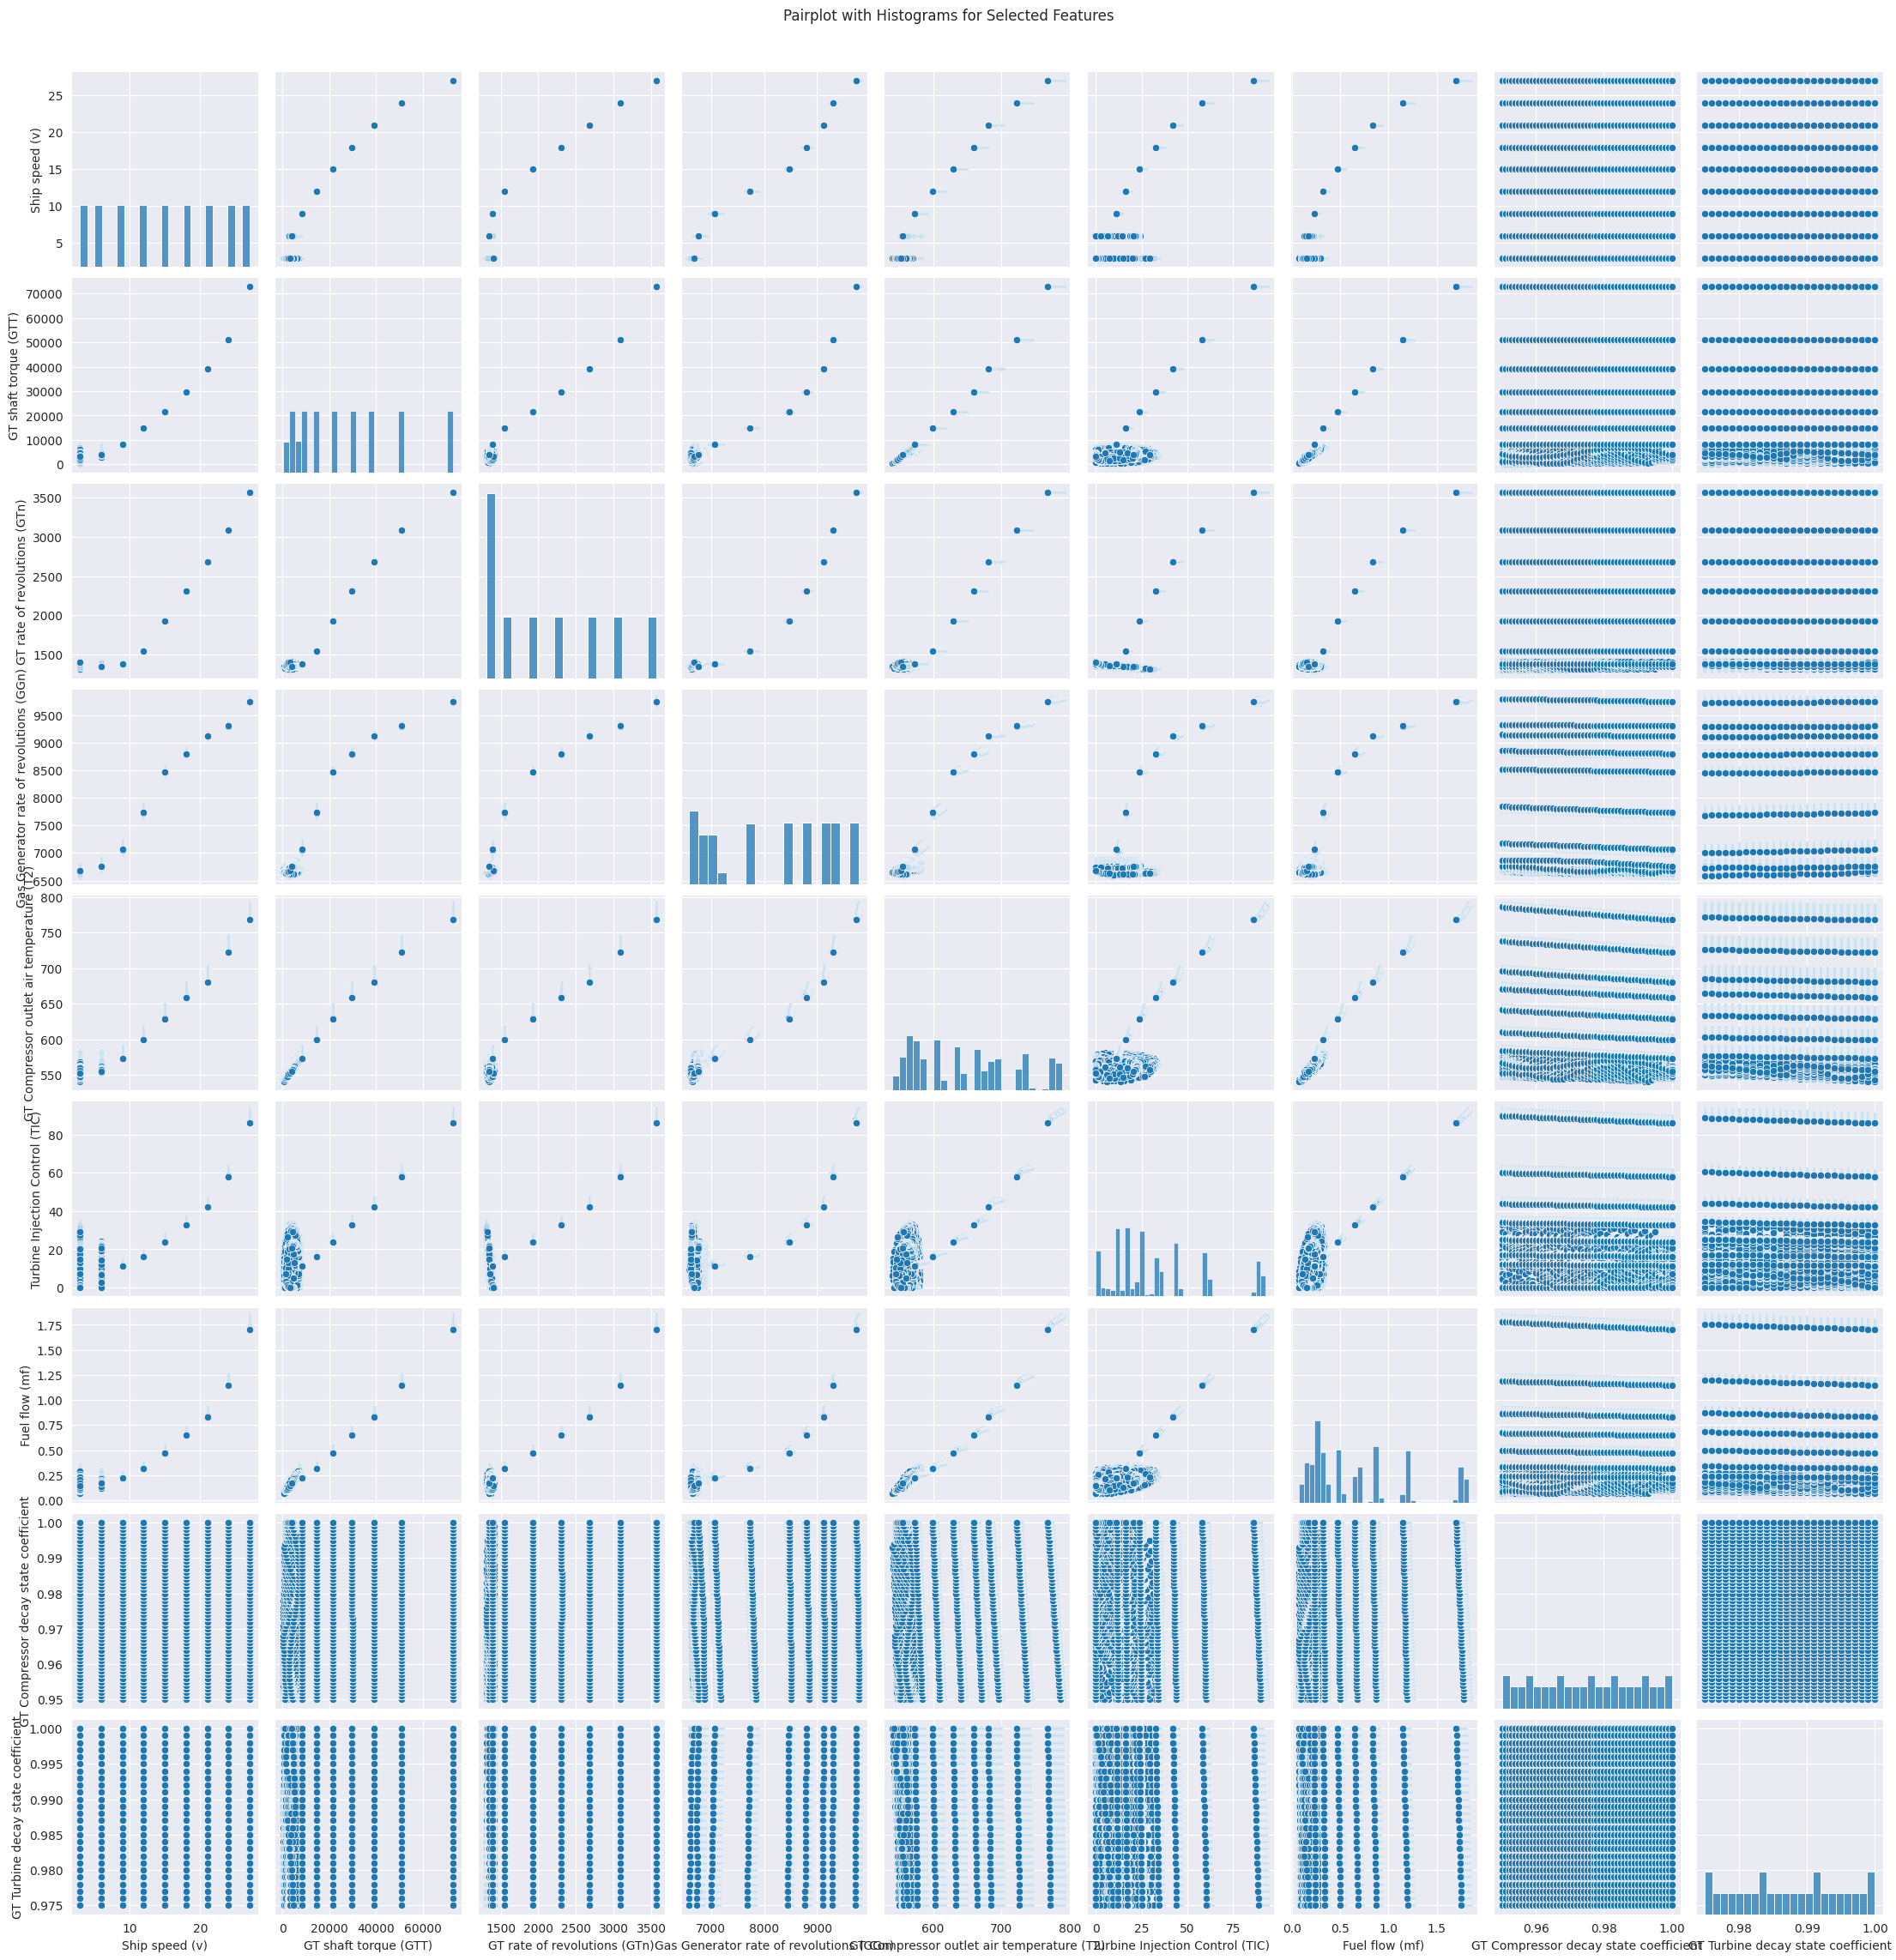

In [16]:
columns_of_interest = [
    "Ship speed (v)", "GT shaft torque (GTT)","GT rate of revolutions (GTn)",
    "Gas Generator rate of revolutions (GGn)", "GT Compressor outlet air temperature (T2)", "Turbine Injection Control (TIC)", "Fuel flow (mf)",
    "GT Compressor decay state coefficient", "GT Turbine decay state coefficient"
]
df_selected = df[columns_of_interest]

pairplot_fig = sns.pairplot(df_selected, diag_kind='hist')

pairplot_fig.fig.suptitle("Pairplot with Histograms for Selected Features", y=1.02)

plt.show()



ValueError: num must be an integer with 1 <= num <= 16, not 17

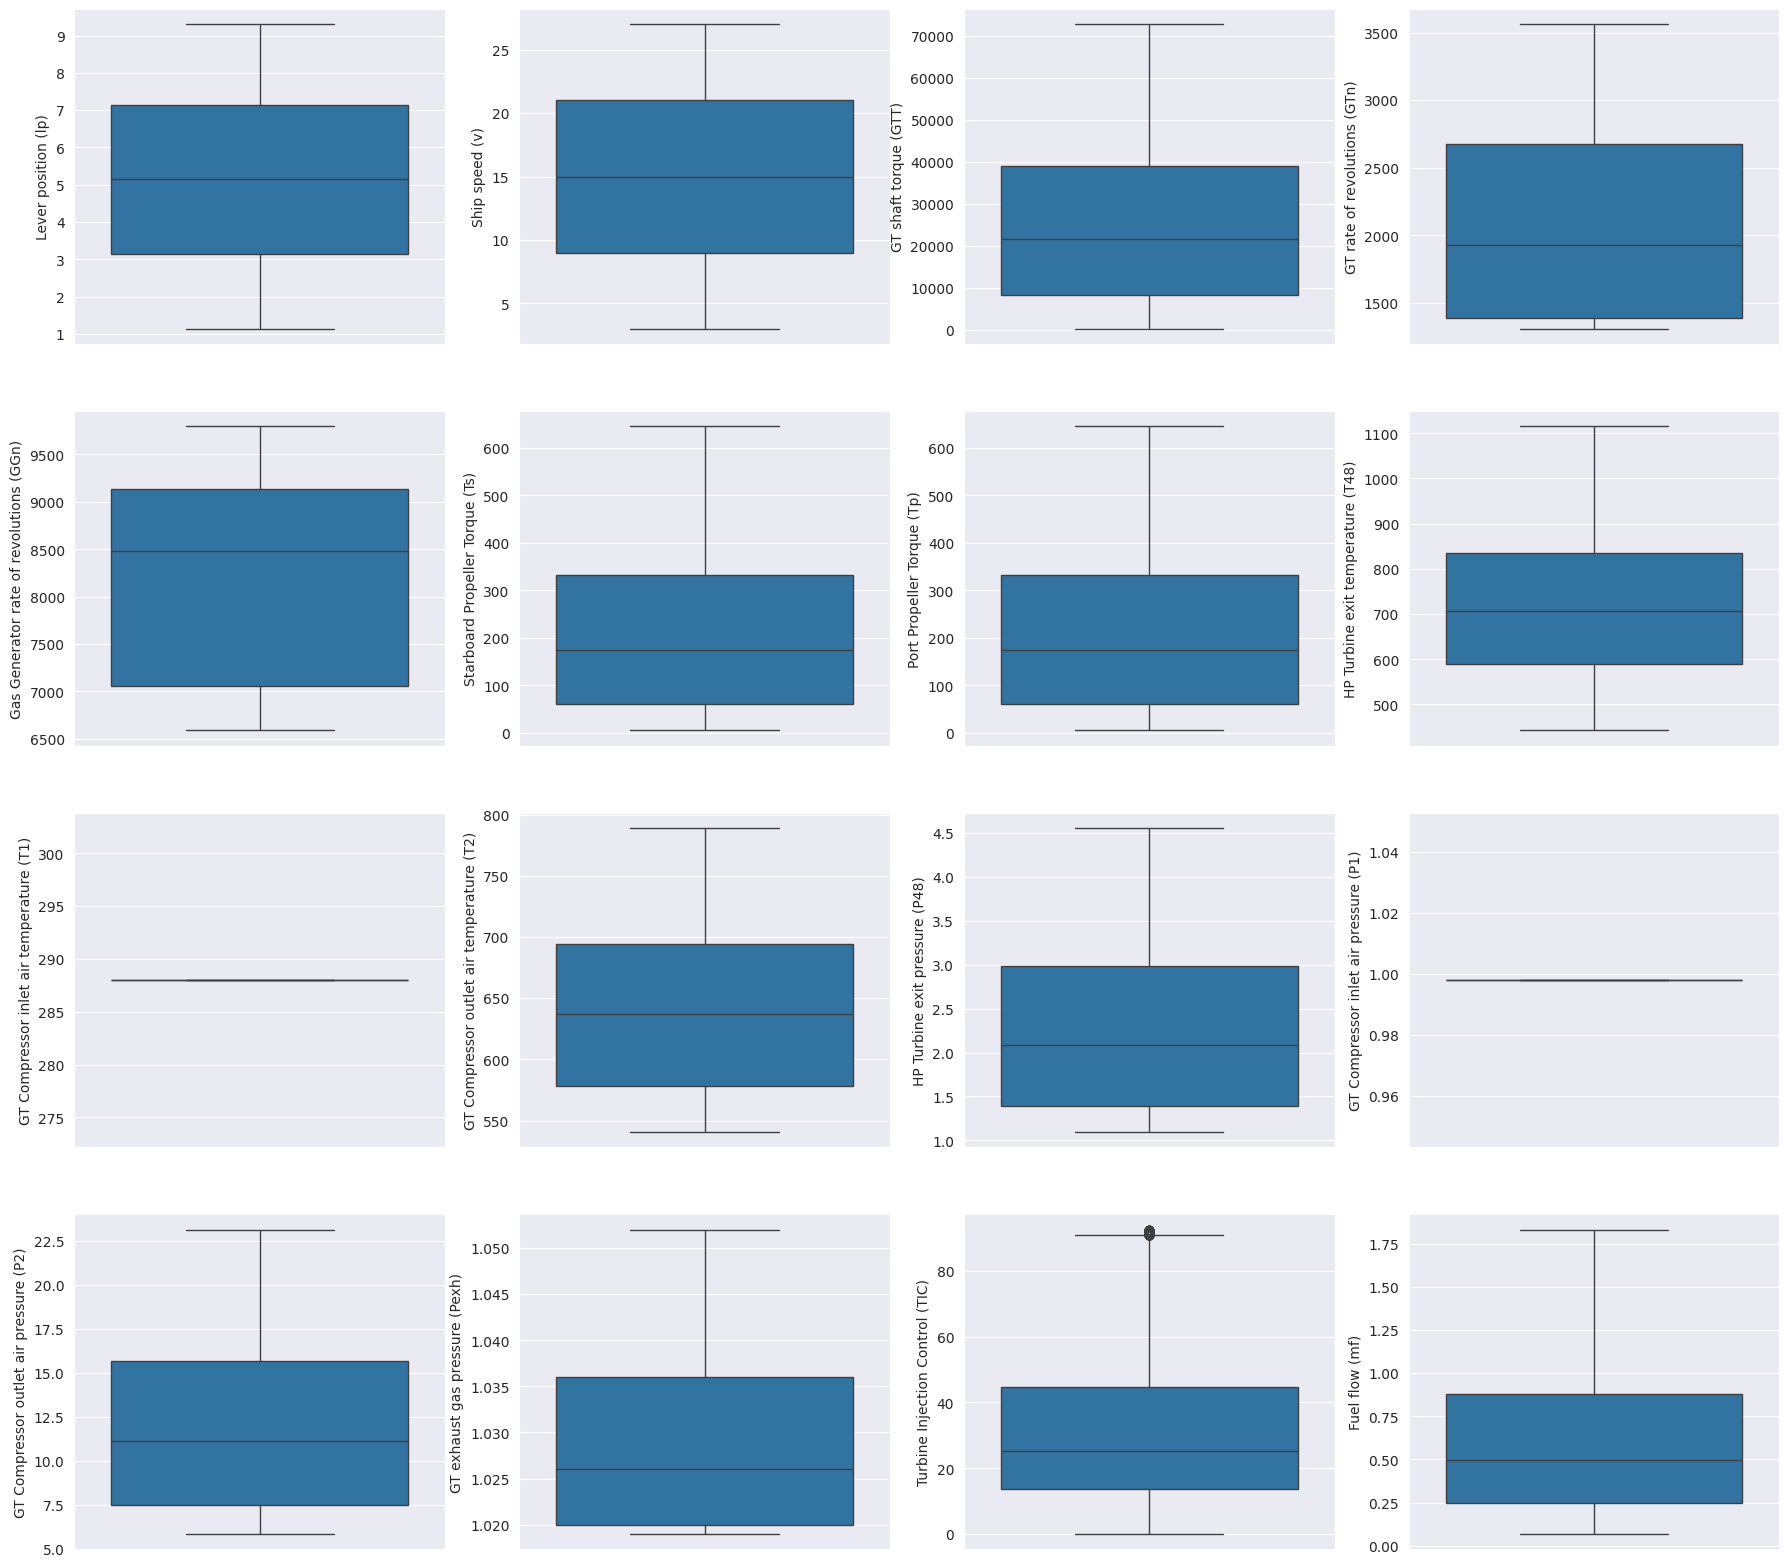

In [18]:
plt.figure(figsize=(22, 20))
icount =1
for col in df.columns:
    plt.subplot(4,4, icount)
    sns.boxplot(df[col], orient="v")
    icount = icount+1
plt.show()


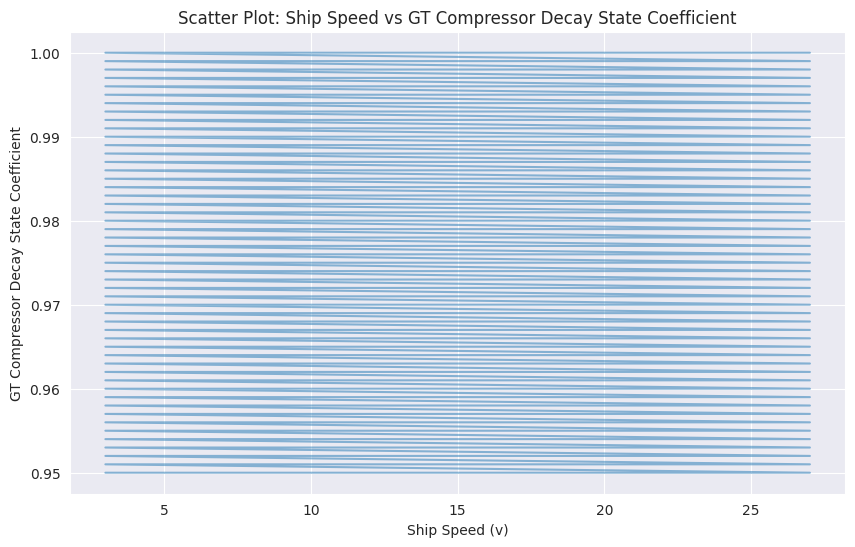

In [17]:
plt.figure(figsize=(10, 6))  
plt.plot(df["Ship speed (v)"], df["GT Compressor decay state coefficient"], alpha=0.5)

plt.title('Scatter Plot: Ship Speed vs GT Compressor Decay State Coefficient')
plt.xlabel('Ship Speed (v)')
plt.ylabel('GT Compressor Decay State Coefficient')

plt.show()